# Pandas包介绍

[Pandas官方文档(英文)](https://pandas.pydata.org/pandas-docs/stable/)

[Pandas文档(中文)](https://pypandas.cn/docs/)

Pandas是一个开源数据分析和数据处理的Python库。它提供了大量便捷的数据结构和数据分析工具，是Python编程语言中用于数据挖掘和数据分析的重要工具之一。

## DataFrame

DataFrame是pandas库中的一种二维标签化数据结构，类似于Excel 的表格或SQL数据库中的表。它是数据分析和处理的基础单元，能够存储多种类型的数据，并提供丰富的函数和方法进行数据操作。

![dataframe](01_table_dataframe.svg)

DataFrame的每一列则是一个Series，同样提供了丰富的函数和方法进行数据操作

![Series](01_table_series.svg)

In [1]:
import pandas as pd

df = pd.DataFrame(
    {
        "Name": [
            "Braund, Mr. Owen Harris",
            "Allen, Mr. William Henry",
            "Bonnell, Miss. Elizabeth",
        ],
        "Age": [22, 35, 58],
        "Sex": ["male", "male", "female"],
    }
)

print(df)
print()
print(df["Age"])
print()
print(df["Age"].max())

                       Name  Age     Sex
0   Braund, Mr. Owen Harris   22    male
1  Allen, Mr. William Henry   35    male
2  Bonnell, Miss. Elizabeth   58  female

0    22
1    35
2    58
Name: Age, dtype: int64

58


In [2]:
import pandas as pd

df = pd.DataFrame(
    {
        "Name": [
            "Braund, Mr. Owen Harris",
            "Allen, Mr. William Henry",
            "Bonnell, Miss. Elizabeth",
        ],
        "Age": [22, 35, 58],
        "Sex": ["male", "male", "female"],
    }
)

df.describe()

Age
count   3.000000
mean   38.333333
std    18.230012
min    22.000000
25%    28.500000
50%    35.000000
75%    46.500000
max    58.000000

## 读取文件
pandas库提供了丰富的函数和方法用于读取各种类型的数据文件，如CSV、Excel、JSON、SQL数据库等。这些函数通常返回一个 DataFrame 对象，方便进行后续的数据分析和处理。

In [3]:
import pandas as pd
df = pd.read_csv("iris.csv")
df.head()

sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa

In [4]:
import pandas as pd
df = pd.read_csv("iris.csv")
df.dtypes

sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
species          object
dtype: object

In [5]:
import pandas as pd
df = pd.read_csv("iris.csv")
df.describe()

sepal_length  sepal_width  petal_length  petal_width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.054000      3.758667     1.198667
std        0.828066     0.433594      1.764420     0.763161
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.350000     1.300000
75%        6.400000     3.300000      5.100000     1.800000
max        7.900000     4.400000      6.900000     2.500000

## 选取子集

我们将以泰坦尼克号数据集为例，展示如何选取DataFrame中的子集。

In [6]:
import pandas as pd
titanic = pd.read_csv("titanic.csv")
titanic.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

比如，我对于乘客们的年龄感兴趣，我们可以通过下面的方式提取出年龄这一列

In [7]:
import pandas as pd
titanic = pd.read_csv("titanic.csv")
ages = titanic["Age"] #选择年龄列
ages.head()

0    22.0
1    38.0
2    26.0
3    35.0
4    35.0
Name: Age, dtype: float64

如果我们对其中两列感兴趣，我们可以这样操作

In [8]:
import pandas as pd
titanic = pd.read_csv("titanic.csv")
age_sex = titanic[["Age", "Sex"]] #选择年龄和性别两列
age_sex.head()

Age     Sex
0  22.0    male
1  38.0  female
2  26.0  female
3  35.0  female
4  35.0    male

如果我们想筛选出，乘客中的所有男性的数据，也就是筛选出表中的某些行，我们可以这样操作

In [9]:
import pandas as pd
titanic = pd.read_csv("titanic.csv")
male_all = titanic[titanic["Sex"] == 'male']
male_all.head()

PassengerId  Survived  Pclass                            Name   Sex   Age  \
0            1         0       3         Braund, Mr. Owen Harris  male  22.0   
4            5         0       3        Allen, Mr. William Henry  male  35.0   
5            6         0       3                Moran, Mr. James  male   NaN   
6            7         0       1         McCarthy, Mr. Timothy J  male  54.0   
7            8         0       3  Palsson, Master. Gosta Leonard  male   2.0   

   SibSp  Parch     Ticket     Fare Cabin Embarked  
0      1      0  A/5 21171   7.2500   NaN        S  
4      0      0     373450   8.0500   NaN        S  
5      0      0     330877   8.4583   NaN        Q  
6      0      0      17463  51.8625   E46        S  
7      3      1     349909  21.0750   NaN        S

同理，我们可以筛选出所有年龄大于35岁的客人

In [10]:
import pandas as pd
titanic = pd.read_csv("titanic.csv")
above_35 = titanic[titanic["Age"] > 35]
above_35.head()

PassengerId  Survived  Pclass  \
1             2         1       1   
6             7         0       1   
11           12         1       1   
13           14         0       3   
15           16         1       2   

                                                 Name     Sex   Age  SibSp  \
1   Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
6                             McCarthy, Mr. Timothy J    male  54.0      0   
11                           Bonnell, Miss. Elizabeth  female  58.0      0   
13                        Andersson, Mr. Anders Johan    male  39.0      1   
15                   Hewlett, Mrs. (Mary D Kingcome)   female  55.0      0   

    Parch    Ticket     Fare Cabin Embarked  
1       0  PC 17599  71.2833   C85        C  
6       0     17463  51.8625   E46        S  
11      0    113783  26.5500  C103        S  
13      5    347082  31.2750   NaN        S  
15      0    248706  16.0000   NaN        S

我们尝试拆分这个过程

In [11]:
import pandas as pd
titanic = pd.read_csv("titanic.csv")
titanic["Age"] > 35

0      False
1       True
2      False
3      False
4      False
       ...  
886    False
887    False
888    False
889    False
890    False
Name: Age, Length: 891, dtype: bool

我们可以看到，`titanic["Age"] > 35`实际上生成了一个元素类型为bool的Series，而这个Series可以做为索引，True所对应的行将会被选择。

如果我们想要，选取特定行以及特定列的数据，我们需要用到`loc`方法

In [12]:
import pandas as pd
titanic = pd.read_csv("titanic.csv")
adult_names = titanic.loc[titanic["Age"] > 35, "Name"]
adult_names.head()

1     Cumings, Mrs. John Bradley (Florence Briggs Th...
6                               McCarthy, Mr. Timothy J
11                             Bonnell, Miss. Elizabeth
13                          Andersson, Mr. Anders Johan
15                     Hewlett, Mrs. (Mary D Kingcome) 
Name: Name, dtype: object

也可以通过数值来筛选，这需要用到`iloc`方法

In [13]:
import pandas as pd
titanic = pd.read_csv("titanic.csv")
titanic.iloc[9:25, 2:5]

Pclass                                               Name     Sex
9        2                Nasser, Mrs. Nicholas (Adele Achem)  female
10       3                    Sandstrom, Miss. Marguerite Rut  female
11       1                           Bonnell, Miss. Elizabeth  female
12       3                     Saundercock, Mr. William Henry    male
13       3                        Andersson, Mr. Anders Johan    male
14       3               Vestrom, Miss. Hulda Amanda Adolfina  female
15       2                   Hewlett, Mrs. (Mary D Kingcome)   female
16       3                               Rice, Master. Eugene    male
17       2                       Williams, Mr. Charles Eugene    male
18       3  Vander Planke, Mrs. Julius (Emelia Maria Vande...  female
19       3                            Masselmani, Mrs. Fatima  female
20       2                               Fynney, Mr. Joseph J    male
21       2                              Beesley, Mr. Lawrence    male
22       3                        McGowan, Miss. Anna "Annie"  female
23       1                       Sloper, Mr. William Thompson    male
24       3                      Palsson, Miss. Torborg Danira  female

`iloc`和`loc`这也可以用于修改其中的元素

In [14]:
import pandas as pd
titanic = pd.read_csv("titanic.csv")
titanic.iloc[0:3, 3] = "anonymous"
titanic.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                           Name     Sex   Age  SibSp  Parch  \
0                                     anonymous    male  22.0      1      0   
1                                     anonymous  female  38.0      1      0   
2                                     anonymous  female  26.0      0      0   
3  Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1      0   
4                      Allen, Mr. William Henry    male  35.0      0      0   

             Ticket     Fare Cabin Embarked  
0         A/5 21171   7.2500   NaN        S  
1          PC 17599  71.2833   C85        C  
2  STON/O2. 3101282   7.9250   NaN        S  
3            113803  53.1000  C123        S  
4            373450   8.0500   NaN        S

## 绘图

pandas提供了更加方便的方式用于绘制各种图形，比如我们想知道乘客年龄的分布

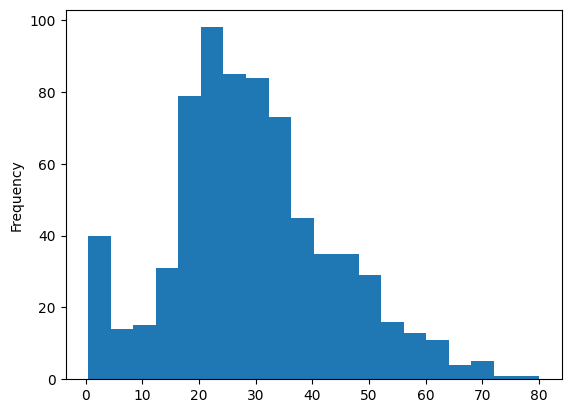

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
titanic = pd.read_csv("titanic.csv")
titanic["Age"].plot.hist(bins=20)
plt.show()

同样，我们也可以绘制箱型图

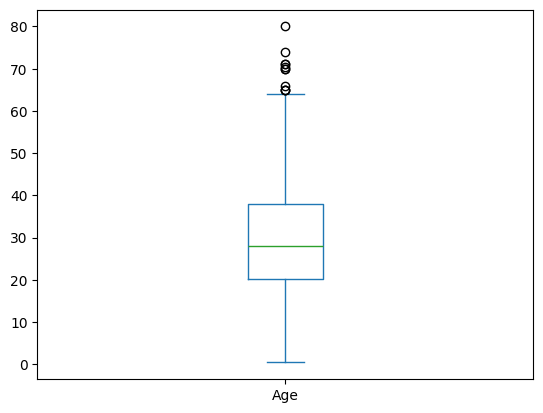

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
titanic = pd.read_csv("titanic.csv")
titanic["Age"].plot.box()
plt.show()

## 添加新列
我们知道，泰坦尼克号失事于1912年，我们可以通过这一信息倒推出乘客的出生年

In [17]:
import pandas as pd
titanic = pd.read_csv("titanic.csv")
titanic["YOB"] = 1912 - titanic["Age"]
titanic.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked     YOB  
0      0         A/5 21171   7.2500   NaN        S  1890.0  
1      0          PC 17599  71.2833   C85        C  1874.0  
2      0  STON/O2. 3101282   7.9250   NaN        S  1886.0  
3      0            113803  53.1000  C123        S  1877.0  
4      0            373450   8.0500   NaN        S  1877.0

## 统计量计算
前面已经介绍过了，如何计算统计量，现在展示如何分组计算统计量，比如我想计算男女乘客分别的平均年龄

In [18]:
import pandas as pd
titanic = pd.read_csv("titanic.csv")
titanic[["Sex", "Age"]].groupby("Sex").mean()

Age
Sex              
female  27.915709
male    30.726645

同样的，如果我想将`Pclass`也加入分类中。

In [19]:
import pandas as pd
titanic = pd.read_csv("titanic.csv")
titanic.groupby(["Sex", "Pclass"])["Age"].mean()

Sex     Pclass
female  1         34.611765
        2         28.722973
        3         21.750000
male    1         41.281386
        2         30.740707
        3         26.507589
Name: Age, dtype: float64

如果我想计算，乘坐3种舱位的乘客数量，下面两种方式将得到相同的结果

In [20]:
import pandas as pd
titanic = pd.read_csv("titanic.csv")
titanic["Pclass"].value_counts()

Pclass
3    491
1    216
2    184
Name: count, dtype: int64

In [21]:
import pandas as pd
titanic = pd.read_csv("titanic.csv")
titanic.groupby("Pclass")["Pclass"].count()

Pclass
1    216
2    184
3    491
Name: Pclass, dtype: int64

## 改变表格布局

有些时候，我们需要按照指定的顺序排列我们的表格，以泰坦尼克号数据集为例

In [22]:
import pandas as pd
titanic = pd.read_csv("titanic.csv")
titanic.sort_values(by="Age").head()

PassengerId  Survived  Pclass                             Name     Sex  \
803          804         1       3  Thomas, Master. Assad Alexander    male   
755          756         1       2        Hamalainen, Master. Viljo    male   
644          645         1       3           Baclini, Miss. Eugenie  female   
469          470         1       3    Baclini, Miss. Helene Barbara  female   
78            79         1       2    Caldwell, Master. Alden Gates    male   

      Age  SibSp  Parch  Ticket     Fare Cabin Embarked  
803  0.42      0      1    2625   8.5167   NaN        C  
755  0.67      1      1  250649  14.5000   NaN        S  
644  0.75      2      1    2666  19.2583   NaN        C  
469  0.75      2      1    2666  19.2583   NaN        C  
78   0.83      0      2  248738  29.0000   NaN        S

有些时候，我们需要将一张“长表格”转化为一张“宽表格”。我们观察[air_quality_long.csv](air_quality_long.csv)中，二氧化氮的部分，并且观察其中的一小部分

In [23]:
import pandas as pd
air_quality = pd.read_csv("air_quality_long.csv", index_col="date.utc", parse_dates=True)
no2 = air_quality[air_quality["parameter"] == "no2"]
no2_subset = no2.sort_index().groupby(["location"]).head(2)
no2_subset

city country            location parameter  \
date.utc                                                                     
2019-04-09 01:00:00+00:00  Antwerpen      BE             BETR801       no2   
2019-04-09 01:00:00+00:00      Paris      FR             FR04014       no2   
2019-04-09 02:00:00+00:00     London      GB  London Westminster       no2   
2019-04-09 02:00:00+00:00  Antwerpen      BE             BETR801       no2   
2019-04-09 02:00:00+00:00      Paris      FR             FR04014       no2   
2019-04-09 03:00:00+00:00     London      GB  London Westminster       no2   

                           value   unit  
date.utc                                 
2019-04-09 01:00:00+00:00   22.5  µg/m³  
2019-04-09 01:00:00+00:00   24.4  µg/m³  
2019-04-09 02:00:00+00:00   67.0  µg/m³  
2019-04-09 02:00:00+00:00   53.5  µg/m³  
2019-04-09 02:00:00+00:00   27.4  µg/m³  
2019-04-09 03:00:00+00:00   67.0  µg/m³

这种表格往往被我们称之为长表格，如果我们想要将其中的3个站点做为单独的列，也就是变为宽表格，在pandas中很容易做到这一点。

In [24]:
import pandas as pd
air_quality = pd.read_csv("air_quality_long.csv", index_col="date.utc", parse_dates=True)
no2 = air_quality[air_quality["parameter"] == "no2"]
no2_subset = no2.sort_index().groupby(["location"]).head(2)
no2_subset.pivot(columns="location", values="value")

location                   BETR801  FR04014  London Westminster
date.utc                                                       
2019-04-09 01:00:00+00:00     22.5     24.4                 NaN
2019-04-09 02:00:00+00:00     53.5     27.4                67.0
2019-04-09 03:00:00+00:00      NaN      NaN                67.0

<Axes: xlabel='date.utc'>

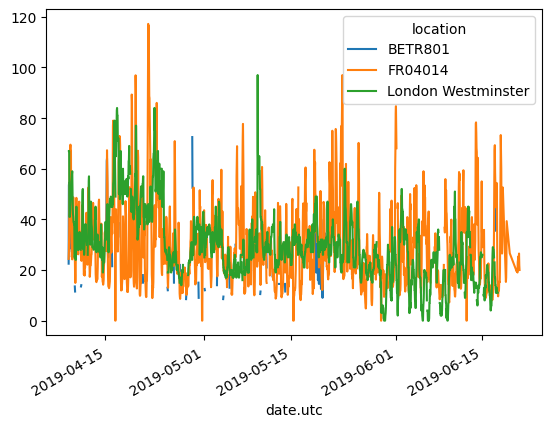

In [25]:
import pandas as pd
air_quality = pd.read_csv("air_quality_long.csv", index_col="date.utc", parse_dates=True)
no2 = air_quality[air_quality["parameter"] == "no2"]
no2.pivot(columns="location", values="value").plot()

我们还可以将宽表格重新转化为长表格

In [26]:
import pandas as pd
air_quality = pd.read_csv("air_quality_long.csv", index_col="date.utc", parse_dates=True)
no2 = air_quality[air_quality["parameter"] == "no2"]
no2_subset = no2.sort_index().groupby(["location"]).head(2)
no2_pivot = no2_subset.pivot(columns="location", values="value").reset_index()
no2_pivot.melt(id_vars="date.utc")

date.utc            location  value
0 2019-04-09 01:00:00+00:00             BETR801   22.5
1 2019-04-09 02:00:00+00:00             BETR801   53.5
2 2019-04-09 03:00:00+00:00             BETR801    NaN
3 2019-04-09 01:00:00+00:00             FR04014   24.4
4 2019-04-09 02:00:00+00:00             FR04014   27.4
5 2019-04-09 03:00:00+00:00             FR04014    NaN
6 2019-04-09 01:00:00+00:00  London Westminster    NaN
7 2019-04-09 02:00:00+00:00  London Westminster   67.0
8 2019-04-09 03:00:00+00:00  London Westminster   67.0

## 合并表格
### 纵向连接
![08_concat_row](08_concat_row.svg)

In [27]:
import pandas as pd
air_quality = pd.read_csv("air_quality_long.csv", index_col="date.utc", parse_dates=True)
#将其拆分为两个表格
air_quality_pm25 = air_quality[air_quality["parameter"] == "pm25"]
air_quality_no2 = air_quality[air_quality["parameter"] == "no2"]
#我们观察其尺寸
print("pm25的尺寸：", air_quality_pm25.shape)
print("no2的尺寸：", air_quality_no2.shape)
#合并两个表格
air_quality2 = pd.concat([air_quality_pm25, air_quality_no2], axis=0)
print("合并后的尺寸：", air_quality2.shape)
air_quality2.head()

pm25的尺寸： (1825, 6)
no2的尺寸： (3447, 6)
合并后的尺寸： (5272, 6)


city country location parameter  value   unit
date.utc                                                                     
2019-06-18 06:00:00+00:00  Antwerpen      BE  BETR801      pm25   18.0  µg/m³
2019-06-17 08:00:00+00:00  Antwerpen      BE  BETR801      pm25    6.5  µg/m³
2019-06-17 07:00:00+00:00  Antwerpen      BE  BETR801      pm25   18.5  µg/m³
2019-06-17 06:00:00+00:00  Antwerpen      BE  BETR801      pm25   16.0  µg/m³
2019-06-17 05:00:00+00:00  Antwerpen      BE  BETR801      pm25    7.5  µg/m³

### 横向连接
![08_merge_left](08_merge_left.svg)

假设我们现在又有了站点的坐标数据[air_quality_long](air_quality_long.csv)，我们想将其添加到[air_quality_long.csv](air_quality_long.csv)这张表上

In [28]:
import pandas as pd
air_quality = pd.read_csv("air_quality_long.csv", index_col="date.utc", parse_dates=True)
stations_coord = pd.read_csv("air_quality_stations.csv")
air_quality = pd.merge(air_quality, stations_coord, how="left", on="location")
air_quality.groupby(["location"]).head(2)

city country            location parameter  value   unit  \
0     Antwerpen      BE             BETR801      pm25   18.0  µg/m³   
1     Antwerpen      BE             BETR801      pm25    6.5  µg/m³   
177      London      GB  London Westminster      pm25    7.0  µg/m³   
178      London      GB  London Westminster      pm25    7.0  µg/m³   
1825      Paris      FR             FR04014       no2   20.0  µg/m³   
1826      Paris      FR             FR04014       no2   21.8  µg/m³   

      coordinates.longitude  
0                   4.43182  
1                   4.43182  
177                -0.13193  
178                -0.13193  
1825                2.39390  
1826                2.39390

## 向量化操作
我们想象这样一个需求，我们需要将泰坦尼克数据集中的所有人名全部改为大写，一般而言，我们会想这样实现

In [29]:
import pandas as pd
titanic = pd.read_csv("titanic.csv")

for i in titanic.iterrows():
    titanic.loc[i[0], "Name"] = titanic.loc[i[0], "Name"].upper()

titanic.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            BRAUND, MR. OWEN HARRIS    male  22.0      1   
1  CUMINGS, MRS. JOHN BRADLEY (FLORENCE BRIGGS TH...  female  38.0      1   
2                             HEIKKINEN, MISS. LAINA  female  26.0      0   
3       FUTRELLE, MRS. JACQUES HEATH (LILY MAY PEEL)  female  35.0      1   
4                           ALLEN, MR. WILLIAM HENRY    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

这看似是一个高效的方法，但是实际上python中循环效率很低，所以实际上，Pandas为我们提供了更加高效的方法

In [30]:
import pandas as pd
titanic = pd.read_csv("titanic.csv")

titanic["Name"] = titanic["Name"].map(lambda x: x.upper())

titanic.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            BRAUND, MR. OWEN HARRIS    male  22.0      1   
1  CUMINGS, MRS. JOHN BRADLEY (FLORENCE BRIGGS TH...  female  38.0      1   
2                             HEIKKINEN, MISS. LAINA  female  26.0      0   
3       FUTRELLE, MRS. JACQUES HEATH (LILY MAY PEEL)  female  35.0      1   
4                           ALLEN, MR. WILLIAM HENRY    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

两种方法实现了同样的效果，我们来对比一下他们的耗时

In [31]:
import pandas as pd
import time
titanic = pd.read_csv("titanic.csv")

T1 = time.perf_counter() 
for i in titanic.iterrows():
    titanic.loc[i[0], "Name"] = titanic.loc[i[0], "Name"].upper()
T2 = time.perf_counter() 
print("使用for循环耗时：", ((T2 - T1)*1000),"ms")

titanic = pd.read_csv("titanic.csv")
T1 = time.perf_counter() 
titanic["Name"] = titanic["Name"].map(lambda x: x.upper())
T2 = time.perf_counter() 
print("使用map方法耗时：", ((T2 - T1)*1000),"ms")

使用for循环耗时： 90.81252600003609 ms
使用map方法耗时： 0.3222920001917373 ms


我们可以看到，这几乎有200倍的性能提升，在面对大量的数据时，这能为我们节省大量的时间。Pandas中，类似的函数还有`apply`和`applymap`它们适用于不同的使用情景，同学们可以自行查阅。